#### Importing Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

#TensorFlow
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import load_model

### Data Reading and Preprocessing

#### Training Data

In [2]:
train_path = 'dataset/train/'

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150), 
    batch_size=32,           
    class_mode='categorical'
)

Found 8000 images belonging to 10 classes.


#### Validation Data

In [3]:
val_path = 'dataset/val/'

val_datagen = ImageDataGenerator(rescale = 1./255)

val_set = val_datagen.flow_from_directory(
    val_path,
    target_size=(150, 150), 
    batch_size=32,           
    class_mode='categorical' 
)

Found 2000 images belonging to 10 classes.


#### Creating List of Categories

In [4]:
Categories = os.listdir(train_path)

#### Testing Data

In [27]:
test_path = 'dataset/test/'

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150), 
    batch_size=32,           
    class_mode='categorical',
    shuffle=False
)

Found 1000 images belonging to 10 classes.


### Exploratory Data Analysis (EDA)

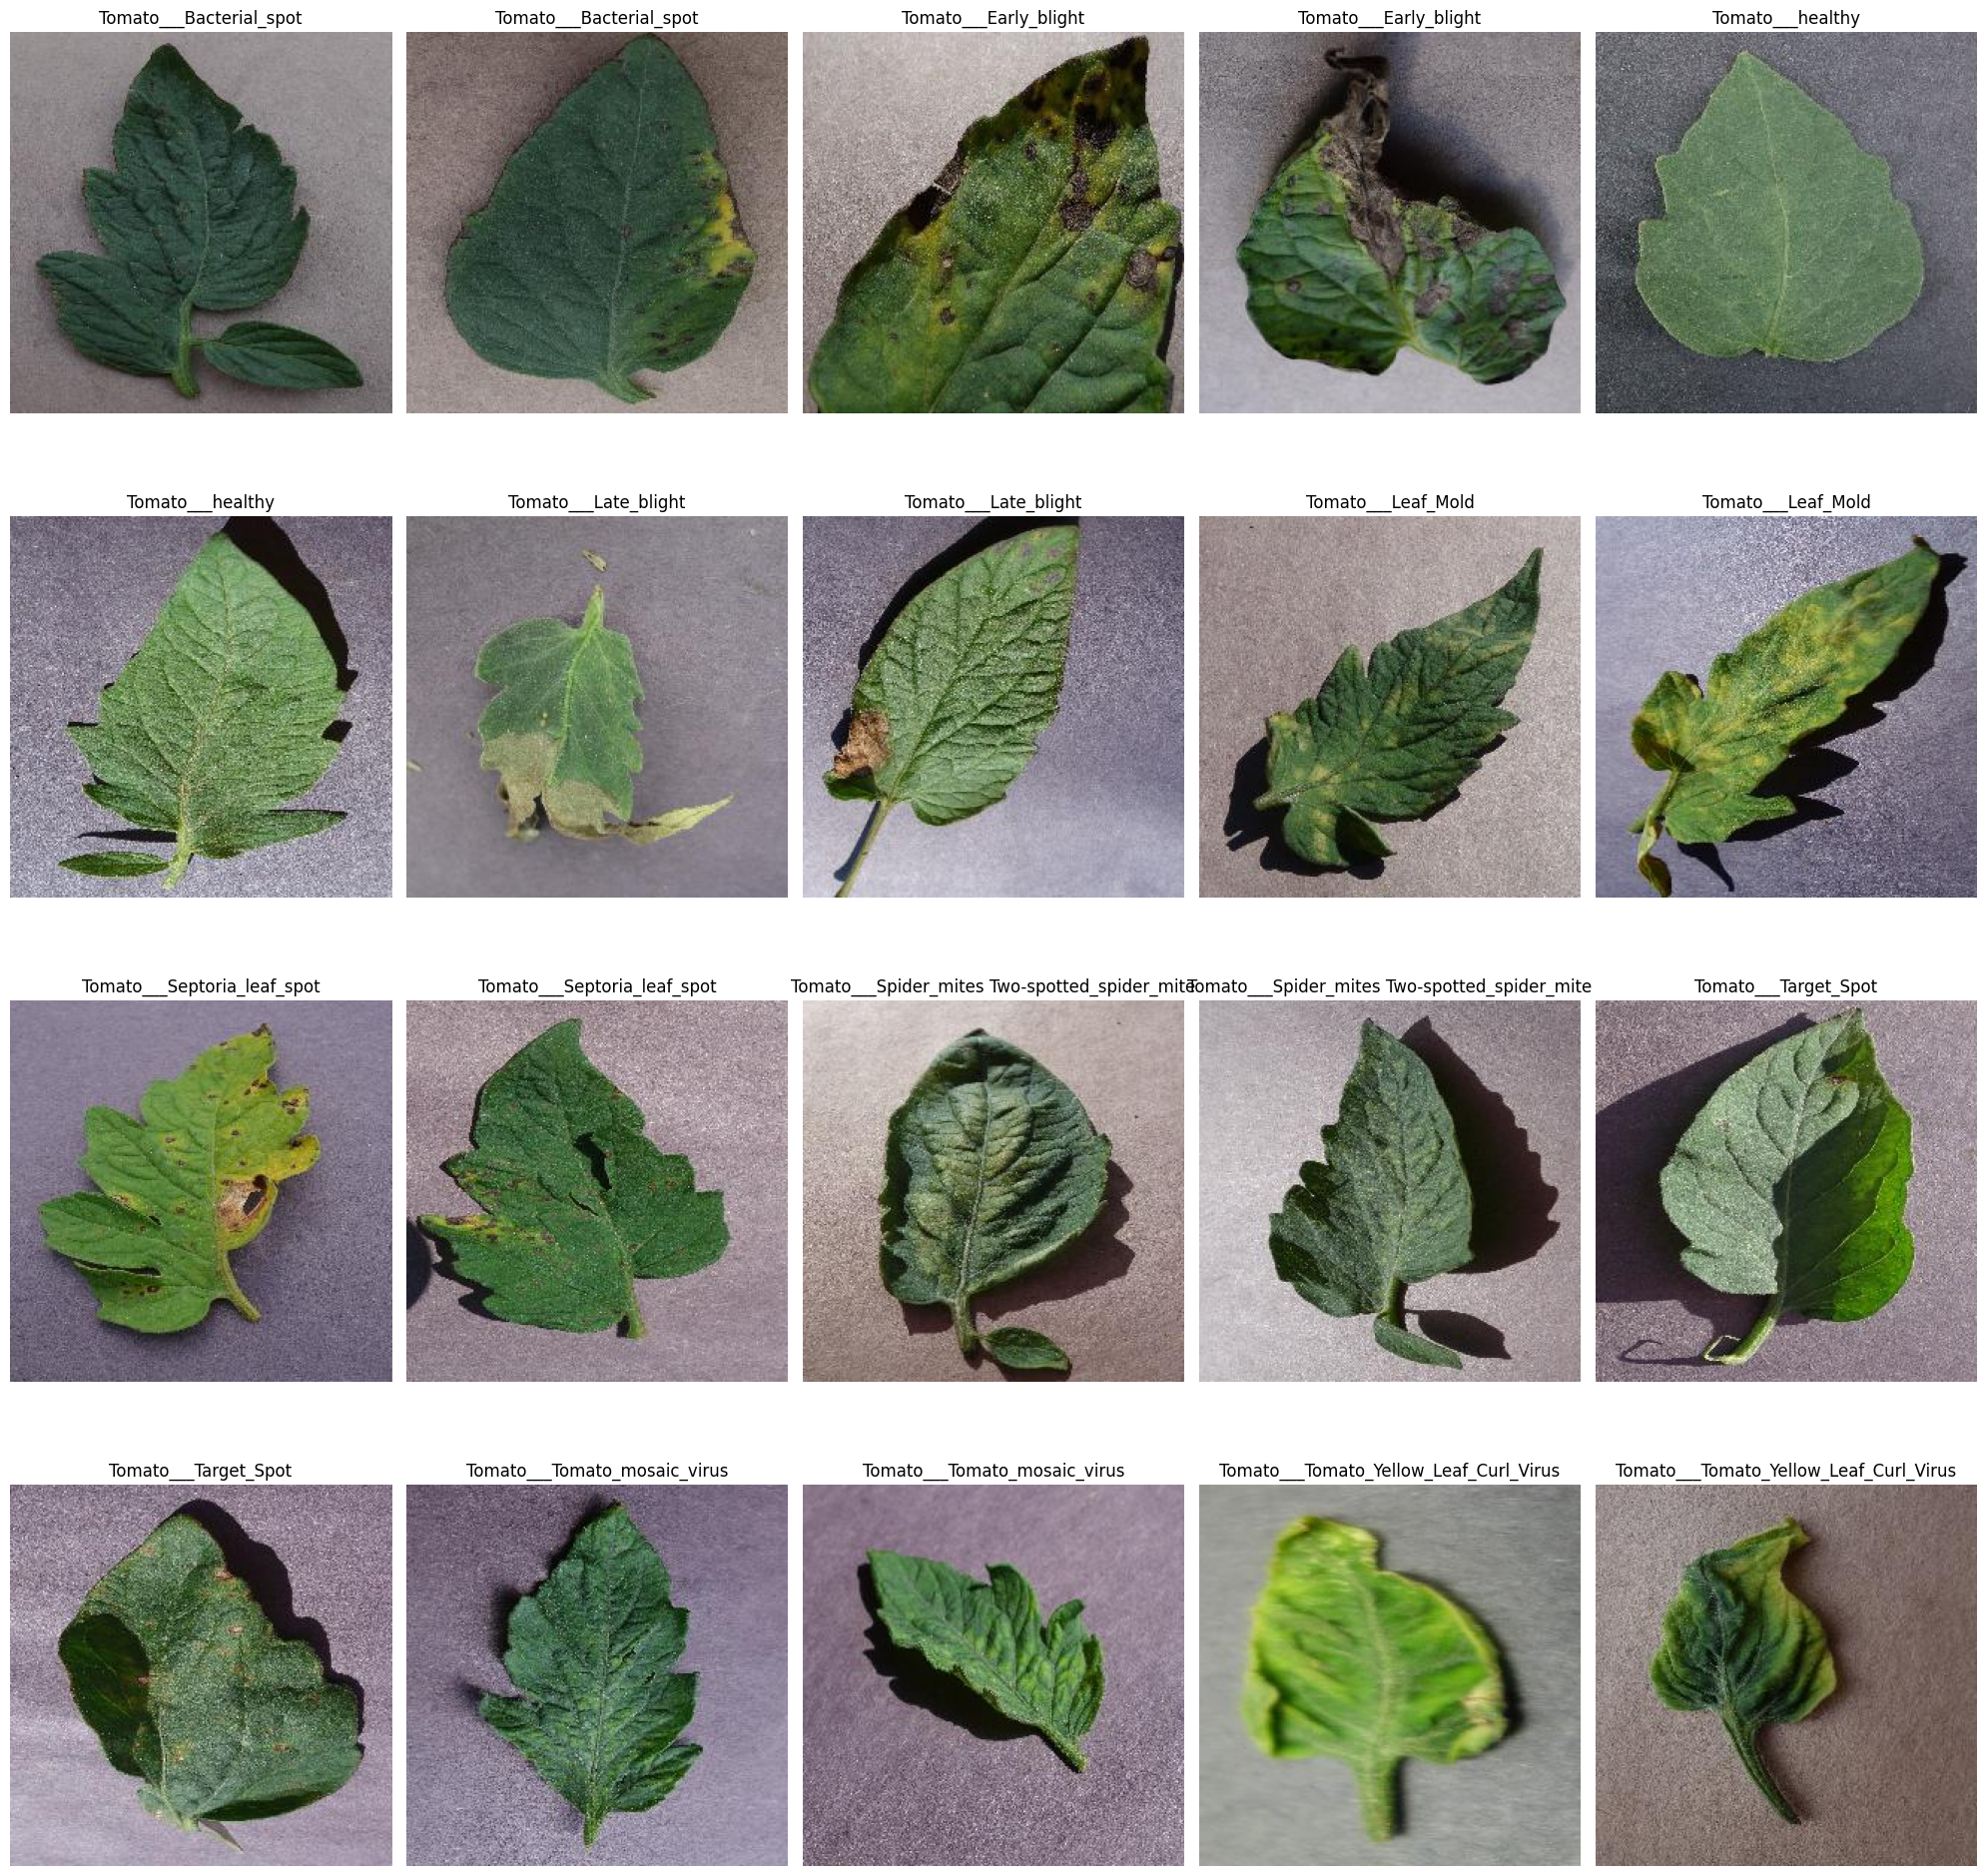

In [6]:
plt.figure(figsize=(20, 20))

for i, category in enumerate(Categories):
    category_images = []
    for img in os.listdir(os.path.join(train_path, category))[:2]:
        image_path = os.path.join(train_path, category, img)
        image = plt.imread(image_path)
        category_images.append(image)
    
    plt.subplot(4,5, i*2 + 1)
    plt.imshow(category_images[0])
    plt.title(category)
    plt.axis('off')
    
    plt.subplot(4, 5, i*2 + 2)
    plt.imshow(category_images[1])
    plt.title(category)
    plt.axis('off')

plt.tight_layout()

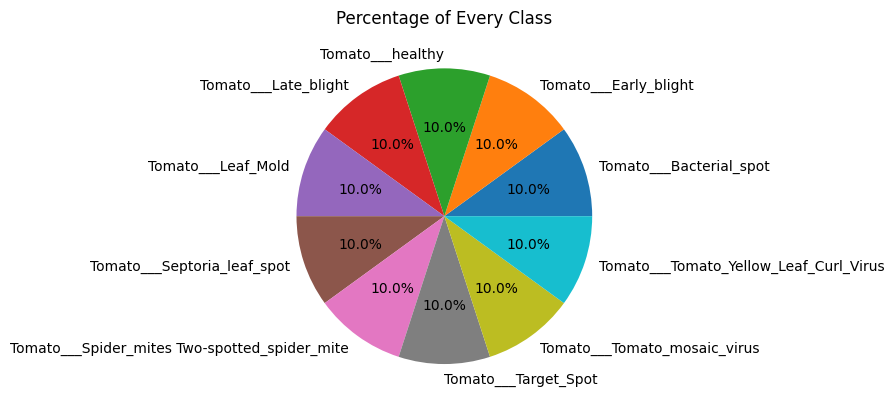

In [7]:
category_size = [0]*len(training_set.class_indices)
for name, indx in training_set.class_indices.items():
    category_size[indx] = len(os.listdir(os.path.join(train_path, name)))

plt.pie(category_size,labels=Categories,autopct='%1.1f%%')
plt.title('Percentage of Every Class')
plt.show()

### Building the Model

In [9]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=[150,150,3]))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=len(Categories),activation='softmax'))

In [10]:
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss',patience=8)
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 17, 17, 128)      

### Training Model

In [13]:
history = model.fit(x=training_set,validation_data=val_set,batch_size=32,epochs=100,callbacks=[early_stopping,checkpoint])

Epoch 1/100
250/250 [==============================] - ETA: 0s - loss: 1.8230 - accuracy: 0.3211
Epoch 1: val_accuracy improved from -inf to 0.47300, saving model to best_model.h5
250/250 [==============================] - 102s 403ms/step - loss: 1.8230 - accuracy: 0.3211 - val_loss: 1.4504 - val_accuracy: 0.4730
Epoch 2/100


C:\Users\chira\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


250/250 [==============================] - ETA: 0s - loss: 1.0522 - accuracy: 0.6264
Epoch 2: val_accuracy improved from 0.47300 to 0.53150, saving model to best_model.h5
250/250 [==============================] - 100s 400ms/step - loss: 1.0522 - accuracy: 0.6264 - val_loss: 1.4306 - val_accuracy: 0.5315
Epoch 3/100
250/250 [==============================] - ETA: 0s - loss: 0.8636 - accuracy: 0.6896
Epoch 3: val_accuracy improved from 0.53150 to 0.71850, saving model to best_model.h5
250/250 [==============================] - 99s 396ms/step - loss: 0.8636 - accuracy: 0.6896 - val_loss: 0.7739 - val_accuracy: 0.7185
Epoch 4/100
250/250 [==============================] - ETA: 0s - loss: 0.7100 - accuracy: 0.7501
Epoch 4: val_accuracy did not improve from 0.71850
250/250 [==============================] - 100s 399ms/step - loss: 0.7100 - accuracy: 0.7501 - val_loss: 0.8536 - val_accuracy: 0.6905
Epoch 5/100
250/250 [==============================] - ETA: 0s - loss: 0.6248 - accuracy: 0.77

In [37]:
# Loading model to avoid training every time
model = load_model('best_model.h5')

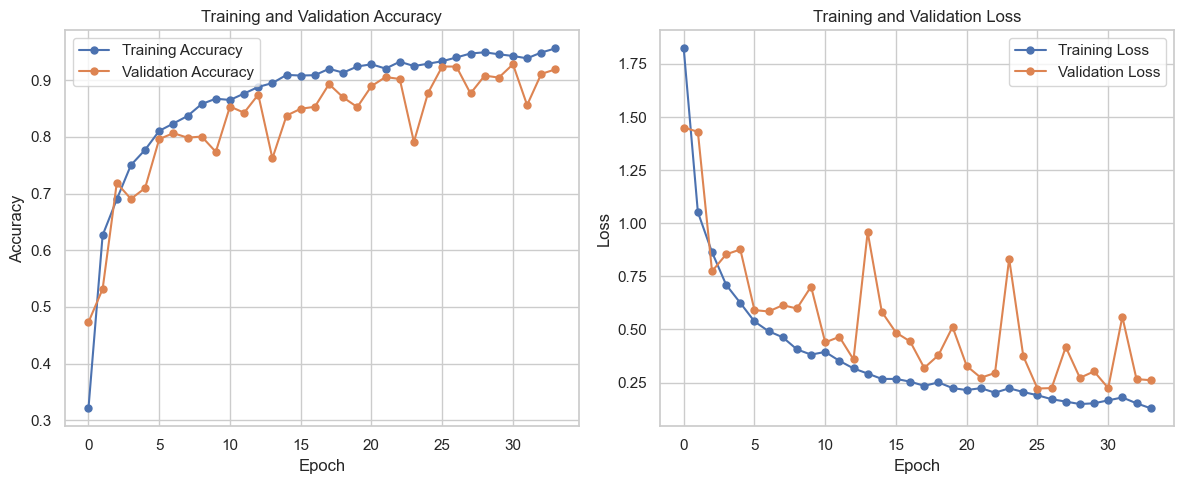

In [17]:
sns.set(style='whitegrid')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', marker='o', markersize=5)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='-', marker='o', markersize=5)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linestyle='-', marker='o', markersize=5)
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='-', marker='o', markersize=5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Testing the Model

In [28]:
loss, accuracy = model.evaluate(test_set)
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")

32/32 [==============================] - 2s 75ms/step - loss: 0.2818 - accuracy: 0.9130
Test Accuracy: 91.30%
Test Loss: 0.2818


In [29]:
prediction = model.predict(test_set)
prediction

32/32 [==============================] - 2s 76ms/step


array([[9.9995506e-01, 4.4926066e-05, 2.5646954e-12, ..., 7.8982030e-09,
        4.1702355e-21, 1.3076907e-13],
       [9.5114237e-01, 4.8247747e-02, 4.8539398e-05, ..., 3.2246122e-04,
        5.6549676e-10, 1.1301386e-06],
       [9.9999750e-01, 2.4549790e-06, 1.7439246e-12, ..., 1.0360356e-08,
        5.2354830e-20, 9.8626966e-13],
       ...,
       [3.2328617e-07, 3.2377477e-06, 4.8100348e-03, ..., 6.4650324e-10,
        4.7711136e-08, 9.9385816e-01],
       [1.1669259e-08, 1.1596223e-07, 5.0945397e-05, ..., 2.4754348e-11,
        7.2308906e-09, 9.9962997e-01],
       [1.0497901e-04, 1.2733237e-05, 5.9330510e-03, ..., 1.1659472e-07,
        8.3259764e-08, 9.9378961e-01]], dtype=float32)

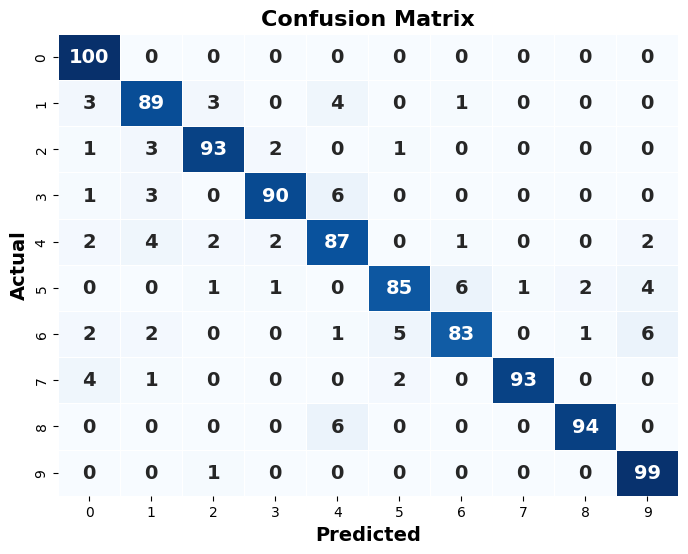

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_set.classes,np.argmax(prediction, axis=1)),annot=True,fmt='d',
            cmap='Blues',cbar=False,annot_kws={'size': 14,'weight':'bold'},linewidths=.5)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()

In [43]:
print('The Classification Report on the Test Data')
print(classification_report(test_set.classes,np.argmax(prediction, axis=1)))

The Classification Report on the Test Data
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       100
           1       0.87      0.89      0.88       100
           2       0.93      0.93      0.93       100
           3       0.95      0.90      0.92       100
           4       0.84      0.87      0.85       100
           5       0.91      0.85      0.88       100
           6       0.91      0.83      0.87       100
           7       0.99      0.93      0.96       100
           8       0.97      0.94      0.95       100
           9       0.89      0.99      0.94       100

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000

